# Clusters Analyze

**Before removing the sex feature:** \
the k-means always stop at early interation 37th (everytime it stops at 37th)\
(eaarly stopping here means that the cluster assignment for all the points stay the same, and there is no need to update the assignments nor centroids location anymore).

All 5 clusters have very different race distribution compared to the race distribution in entire population. 

**After removing the sex feature:**\
the model never early stop, if I set max iterations num to be 200, it will update the cluster assignment and centroids location 200 times, same as when I do 100 iterations. \
(I only tried running the model with max 200 iterations because it takes a couple hours for it to run, my implementation only has the basic funtionalities I am using, sklearn model might run faster with their more complex data-structures and large system capacity, but it might be uncessary to focues on the time complexity for this task.)

Only the middle cluster (cluster 2) have a very different race distribution, with more Black and less White people. 
<img src='image/race_dist_without_sex.png' width='850'>

### geographic Info (Areas)
location info in cluster 2: Most 77th Street data (large amount of Felony arrest case), not much Pacific data; has data from Foothill and Topanga (considered "White" neighborhood, which is weird in this cluster), but not include data from N Hollywood and Central. 


### Loss Scores
Cluster 2 also have the largest loss scores (average distance from each datapoint to centroid):\
[1.44183119, 1.442229  , **1.65951413**, 1.44115138, 1.44367271]

### Centroids
For the centroids: it looks like the data were clustered based on arrest type, with almost all felony cases goes into cluster 2:\
arrest type of F centroids at: [0.02289708 0.01039936 **0.99527436**, 0.01621098 0.0322704 ]

### Arrest Type - determine factor now
<font color='red'>Not sure why arrest type has so much impact on the model (so as gender before we removed it), I am guessing felony cases all share great similarities and are quite different from rest of the data, that's why the model is so certain they should go into the same group (so as gender case). Gender might also be a dependent variable on arrest type, as only male has felony arrest case.</font>

### Questions
<font color='red'>**Some questions:**</font>
1. not sure why early stopping always happen at iter37th if I had sex feature, and never early stop if i don't have sex feature.
2. the cluster that shows different from overall race distribution is the one that has the largest loss score (avg didtance), not sure why loss score is correlated.
3. when writing the report, do I need to address everything I tried, what I learned, and why they didn't work? (specifically I mean the different models I tried (sklearn), and different features I used).

### Vis: Dim Reduction on Clusters (compared to with gender feature before)
The clusters looks a littttle bit messy compared to before (or it also could be the problem with dimension reduction)\
I guess it makes sense if arrest type is dependent on gender (or the other way around), if we have both gender and arrest type (in left figure), we would actually duplicate the infomation they tell, but I am not sure why is that reflected on the clusters. I am not sure why duplicate information would actually make the model groups better.\
Left: with sex feature;            Right: without sex feature
<table><tr>
<td> <img src='image/dim_red_custom.png' width='450'> </td>
<td> <img src='image/cluster_without_sex.png' width='450'> </td>
</tr></table>


In [1]:
import pandas as pd
import numpy as np
import datetime
import ast

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE, MDS

#custom function
from features import *

In [2]:
#reading in the original data (to extract features we care ab) and get the X and y
arrest = pd.read_csv('arrest-data-from-2010-to-present.csv')
arrest_feature_df, label = arrest_features_label(arrest)

In [4]:
#read grouping assignments from week9 notebook file (without sex)
arrest_cluster = pd.read_csv('data/clustered_arrest_new.csv')
arrest_cluster = arrest_cluster.drop(columns = ['Unnamed: 0'])

In [5]:
#read OLD grouping assignments from week9 notebook file (WITH sex)
arrest_cluster_sex = pd.read_csv('data/features_with_cluster.csv')
arrest_cluster_sex = arrest_cluster_sex.drop(columns = ['Unnamed: 0'])

In [6]:
arrest_feature_df.columns

Index([   'day',  'month',   'hour', 'minute',   'area',    'lat',    'lon',
          'age',      'D',      'F',      'I',      'M',      'O',      1.0,
            2.0,      3.0,      4.0,      5.0,      6.0,      7.0,      8.0,
            9.0,     10.0,     11.0,     12.0,     13.0,     14.0,     15.0,
           16.0,     17.0,     18.0,     19.0,     20.0,     21.0,     22.0,
           23.0,     24.0,     25.0,     26.0,     27.0],
      dtype='object')

In [7]:
#copy and paste from week9 notebook (where we run the model without sex)

loss = np.array([1.44183119, 1.442229  , 1.65951413, 1.44115138, 1.44367271])

center = np.array([[2.87939977e-01, 7.40538672e-01, 6.27467127e-01, 6.17184092e-01,
        5.07664497e-01, 5.23434557e-01, 6.31264292e-01, 3.91918757e-01,
        1.36579095e-03, 2.28970836e-02, 7.26011623e-02, 8.80479901e-01,
        2.26560617e-02, 1.60681289e-04, 5.35604296e-05, 1.31223052e-03,
        6.32013069e-03, 1.76749418e-03, 1.26670416e-02, 2.81192255e-03,
        2.81192255e-02, 1.17832945e-03, 2.54412040e-03, 1.74071396e-03,
        5.30248253e-03, 5.84612089e-02, 9.02493238e-03, 2.65124126e-03,
        6.28799443e-02, 7.90284138e-02, 1.75624649e-01, 1.01764816e-03,
        3.70102568e-02, 2.32987869e-03, 1.80686109e-01, 7.73412603e-02,
        2.35880132e-01, 8.03406443e-05, 1.01764816e-03, 1.29884042e-02],
       [2.54710087e-01, 2.36643844e-01, 5.65423702e-01, 2.60408215e-01,
        4.94820423e-01, 5.25385587e-01, 6.38414931e-01, 3.83449192e-01,
        1.44733315e-03, 1.03993567e-02, 5.91262396e-02, 9.06378987e-01,
        2.26480836e-02, 5.36049317e-05, 0.00000000e+00, 5.09246851e-04,
        5.54811043e-03, 1.04529617e-03, 1.25167515e-02, 2.41222192e-03,
        2.86518360e-02, 1.07209863e-03, 1.82256768e-03, 1.28651836e-03,
        4.18118467e-03, 5.98231037e-02, 9.75609756e-03, 2.35861699e-03,
        6.39506835e-02, 6.72741892e-02, 1.78397213e-01, 1.15250603e-03,
        3.68801930e-02, 1.52774055e-03, 1.78799250e-01, 7.99249531e-02,
        2.37845082e-01, 0.00000000e+00, 1.07209863e-03, 2.21388368e-02],
       [4.82991659e-01, 4.75123163e-01, 6.06194471e-01, 4.05442237e-01,
        5.08191677e-01, 5.09749347e-01, 7.25873534e-01, 3.43725270e-01,
        3.05976746e-04, 9.95274359e-01, 1.18990957e-03, 0.00000000e+00,
        3.22975454e-03, 5.04861631e-03, 2.37981913e-03, 8.61834501e-02,
        1.03590127e-01, 4.75113891e-02, 2.60930169e-02, 9.50057796e-02,
        2.00244781e-02, 1.09301693e-02, 1.29530156e-02, 1.45338954e-02,
        8.80873054e-02, 1.78486435e-03, 5.28659822e-03, 3.73971578e-04,
        2.79611750e-01, 3.05976746e-04, 4.24967702e-04, 0.00000000e+00,
        1.35989665e-04, 5.09961243e-05, 3.05466785e-02, 1.19500918e-02,
        1.56065139e-01, 8.15937989e-04, 1.86985789e-04, 1.18990957e-04],
       [7.20588030e-01, 3.04727825e-01, 6.21496133e-01, 6.53813648e-01,
        4.94091766e-01, 5.22195238e-01, 6.38234933e-01, 3.83566025e-01,
        9.95181228e-04, 1.62109784e-02, 7.04745443e-02, 8.90163419e-01,
        2.21558768e-02, 1.57133878e-04, 5.23779594e-05, 9.16614289e-04,
        6.04965431e-03, 1.70228368e-03, 1.34611356e-02, 2.67127593e-03,
        2.81007752e-02, 7.33291431e-04, 2.22606327e-03, 1.67609470e-03,
        5.05447308e-03, 6.40320553e-02, 8.95663105e-03, 2.77603185e-03,
        6.16750471e-02, 7.79122145e-02, 1.71066415e-01, 1.15231511e-03,
        3.46218311e-02, 1.99036246e-03, 1.76749424e-01, 8.00858999e-02,
        2.34496124e-01, 0.00000000e+00, 6.28535512e-04, 2.10559397e-02],
       [6.84017816e-01, 6.47012795e-01, 4.63451011e-01, 1.46838469e-01,
        5.10213952e-01, 5.33010521e-01, 6.20593184e-01, 3.76887072e-01,
        1.53018007e-03, 3.22704047e-02, 5.60701697e-02, 8.89553789e-01,
        2.05754570e-02, 2.18597153e-04, 8.19739323e-05, 2.10399760e-03,
        8.57993825e-03, 2.54119190e-03, 1.40175424e-02, 4.67251414e-03,
        3.02483810e-02, 1.39355685e-03, 2.89641227e-03, 1.66680329e-03,
        5.98409706e-03, 5.74910512e-02, 7.43230319e-03, 2.18597153e-03,
        6.25734350e-02, 6.53878733e-02, 1.43317758e-01, 1.09298576e-03,
        4.18067055e-02, 1.96737437e-03, 2.13350821e-01, 7.45689537e-02,
        2.39172610e-01, 2.73246441e-05, 1.12031041e-03, 1.40995164e-02]])

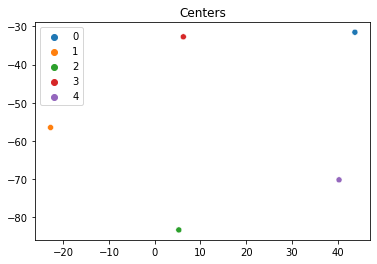

In [8]:
#Reduce dim and plot centroids
center_num = [0, 1, 2, 3, 4]

dims = TSNE(random_state=42).fit_transform(center)
dim1, dim2 = dims[:, 0], dims[:, 1]
sns.scatterplot(x=dim1, y=dim2, hue=center_num, palette='tab10', legend=True)
plt.title('Centers');

In [9]:
#checking centroids location (without sex)
for i in range(len(arrest_feature_df.columns)):
    if i < 8:
        print(arrest_feature_df.columns[i], 'centroids at:', center[:,i])
    elif i < 13:
        print('arrest type of', arrest_feature_df.columns[i], 'centroids at:', center[:,i])
    else:
        print('charge num ', str(arrest_feature_df.columns[i]), 'centroids at:', center[:,i])


day centroids at: [0.28793998 0.25471009 0.48299166 0.72058803 0.68401782]
month centroids at: [0.74053867 0.23664384 0.47512316 0.30472783 0.64701279]
hour centroids at: [0.62746713 0.5654237  0.60619447 0.62149613 0.46345101]
minute centroids at: [0.61718409 0.26040821 0.40544224 0.65381365 0.14683847]
area centroids at: [0.5076645  0.49482042 0.50819168 0.49409177 0.51021395]
lat centroids at: [0.52343456 0.52538559 0.50974935 0.52219524 0.53301052]
lon centroids at: [0.63126429 0.63841493 0.72587353 0.63823493 0.62059318]
age centroids at: [0.39191876 0.38344919 0.34372527 0.38356602 0.37688707]
arrest type of D centroids at: [0.00136579 0.00144733 0.00030598 0.00099518 0.00153018]
arrest type of F centroids at: [0.02289708 0.01039936 0.99527436 0.01621098 0.0322704 ]
arrest type of I centroids at: [0.07260116 0.05912624 0.00118991 0.07047454 0.05607017]
arrest type of M centroids at: [0.8804799  0.90637899 0.         0.89016342 0.88955379]
arrest type of O centroids at: [0.0226560

## Get Features Columns

In [10]:
arrest = arrest.dropna(axis=0)

#date (month, date), and time (hour,  minute)
day = arrest['Arrest Date'].apply(lambda x: int(str(x)[8:10]))
month = arrest['Arrest Date'].apply(lambda x: int(str(x)[5:7]))
hour = arrest['Time'].apply(lambda x: int(str(int(x))[:-2]) if str(int(x))[:-2] != '' else 0)
minute = arrest['Time'].apply(lambda x: int(str(int(x))[-2:]) if str(int(x))[:-2] != '' else 0)

#location (Geographic Areas, latitude, longitude)
area_ID = arrest['Area ID']
area_name = arrest['Area Name']
sub_area = arrest['Reporting District']

latitude = arrest['Location'].apply(lambda x: float(ast.literal_eval(x)['latitude']))
longitude = arrest['Location'].apply(lambda x: float(ast.literal_eval(x)['longitude']))
street = arrest['Address'] #Street address of crime incident rounded to the nearest hundred block to maintain anonymity.

#charge and arrest type
dummies_arrest = arrest['Arrest Type Code'] #A code to indicate the type of charge the individual was arrested for. 
#D - Dependent F - Felony I - Infraction M - Misdemeanor O - Other
dummies_arrest = dummies_arrest.map({'D' : 'Dependent', 'F' : 'Felony', 'I' : 'Infraction', 'M' : 'Misdemeanor', 'O' : 'Other'})

dummies_charge = arrest['Charge Group Code'] #Category of arrest charge.
charge_description = arrest['Charge Group Description']#Defines the Charge Group Code provided.

#Age
age = arrest['Age']
#sex
dummies_sex = arrest['Sex Code']
#race
dummies_race = arrest['Descent Code']



df_feature = pd.concat({'day':day, 'month':month, 
                            'hour':hour, 'minute': minute, 
                            'area':area_ID, 'area_name':area_name, 'sub_area':sub_area,
                            'lat':latitude, 'lon':longitude, 'street':street,
                            'arrest_type':dummies_arrest, 
                            'charge_type': dummies_charge, 'charge_description':charge_description,
                            'age': age, 'sex': dummies_sex, 'race_label':dummies_race
                            },axis=1)


## Merge feature with Cluster label

In [11]:
data = df_feature.reset_index().drop(columns=['index'])
data['grouping'] = arrest_cluster.grouping
data

,day,month,hour,minute,area,area_name,sub_area,lat,lon,street,arrest_type,charge_type,charge_description,age,sex,race_label,grouping
0,22,6,4,0,15,N Hollywood,1543,34.1649,-118.3965,MAGNOLIA AV,Misdemeanor,22.0,Driving Under Influence,31,F,O,4
1,22,6,2,40,18,Southeast,1842,33.9310,-118.2739,IMPERIAL,Misdemeanor,22.0,Driving Under Influence,20,M,H,3
2,22,6,16,15,12,77th Street,1293,33.9419,-118.3090,W 104TH ST,Felony,12.0,Weapon (carry/poss),14,M,B,2
3,22,6,0,0,14,Pacific,1406,34.0240,-118.4090,CULVER BL,Misdemeanor,22.0,Driving Under Influence,35,M,H,4
4,22,6,7,25,8,West LA,853,34.0445,-118.4491,SANTAMONICA BL,Misdemeanor,23.0,Moving Traffic Violations,26,M,B,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208255,1,1,22,0,13,Newton,1343,33.9939,-118.2478,COMPTON AV,Misdemeanor,22.0,Driving Under Influence,41,M,H,1
208256,1,1,17,25,16,Foothill,1667,34.2360,-118.3674,TUXFORD,Felony,7.0,Vehicle Theft,16,M,H,2
208257,1,1,21,50,12,77th Street,1251,33.9745,-118.3309,CRENSHAW,Felony,3.0,Robbery,15,M,B,2
208258,1,1,22,15,11,Northeast,1118,34.1101,-118.1918,AVENUE 58,Misdemeanor,24.0,Miscellaneous Other Violations,12,M,H,1


From the histogram below:

<font color='red'>
    
- cluster 0: slightly more Black and White, and **significantly less Hispanic**
- cluster 1: **significantly less Black**, and slightly more Hispanic and White
- cluster 2: **significantly MORE Black**, and **significantly LESS White**
- cluster 3: **significantly MORE Black**, and **significantly LESS Hispanic**
- cluster 4: **significantly less Black**, and slightly more Hispanic and White.

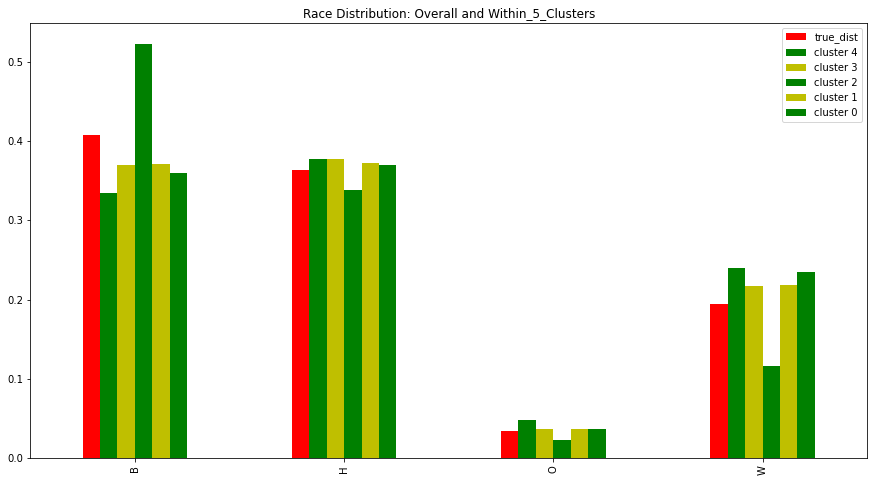

{'true_dist': B    0.407623
 H    0.363628
 W    0.194310
 O    0.034438
 Name: race_label, dtype: float64,
 'cluster 4': H    0.377915
 B    0.334180
 W    0.239630
 O    0.048274
 Name: race_label, dtype: float64,
 'cluster 3': H    0.377344
 B    0.369300
 W    0.216626
 O    0.036730
 Name: race_label, dtype: float64,
 'cluster 2': B    0.522949
 H    0.337881
 W    0.116651
 O    0.022519
 Name: race_label, dtype: float64,
 'cluster 1': H    0.372752
 B    0.371321
 W    0.218883
 O    0.037043
 Name: race_label, dtype: float64,
 'cluster 0': H    0.370073
 B    0.359288
 W    0.234340
 O    0.036298
 Name: race_label, dtype: float64}

In [12]:
from distribution_plot import *
plot_distribution(data)
get_true_and_cluster_value(data)

## EDA on all data

In [13]:
def plot_time(df):
    #Day
    df['day'].value_counts(normalize=True).reset_index().sort_values(by='index').set_index('index').plot(figsize=(6, 5))
    plt.title('Day')
    plt.show()
    #Month
    df['month'].value_counts(normalize=True).reset_index().sort_values(by='index').set_index('index').plot(kind='barh', figsize=(6, 5))
    plt.title('Month')
    plt.show()
    #Hour
    df['hour'].value_counts(normalize=True).reset_index().sort_values(by='index').set_index('index').plot(kind='barh', figsize=(6, 5))
    plt.title('Hour')
    plt.show()
    #Minute
    df['minute'].value_counts(normalize=True).reset_index().sort_values(by='index').set_index('index').plot(figsize=(6, 5))
    plt.title('Minute')
    plt.show()

In [14]:
#lat and long
sns.set(rc={'figure.figsize':(10,7)})
def plot_all_area(df):
    #Area (21 lapd divisions)
    df['area_name'].value_counts(normalize=True).plot(kind='barh', figsize=(7, 5))
    plt.title('Area name')
    plt.show()
    
    
def plot_area(df):
    
    most_incident_areas = df['area_name'].value_counts(normalize=True).index[:-10] #top 10 areas
    most_area = df[df.area_name.isin(most_incident_areas)]
    sns.scatterplot(data=most_area, hue='area_name', x='lat', y='lon', palette="deep")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.title('Top10_Areas')
    plt.show()

#     show all areas
#     sns.scatterplot(data=df, hue='area_name', x='lat', y='lon', palette="deep")
#     plt.legend(loc=2)
#     plt.title('All_Areas')
#     plt.show()
    
    return most_incident_areas

def plot_arrest_type(df):
    df.arrest_type.value_counts(normalize=True).plot(kind='barh', figsize=(7, 5))
    plt.title('Arrest Type')
    plt.show()
    
def plot_sex_race(df):
    df.sex.value_counts(normalize=True).plot(kind='barh', figsize=(7, 5))
    plt.title('Sex')
    plt.show()

    df.race_label.value_counts(normalize=True).plot(kind='barh', figsize=(7, 5))
    plt.title('Race')
    plt.show()
    

<font color='red'> Less incident at the end of the month, during winter, at night </font>

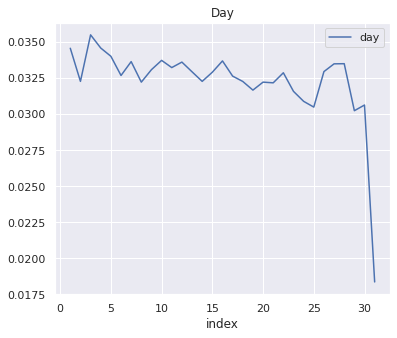

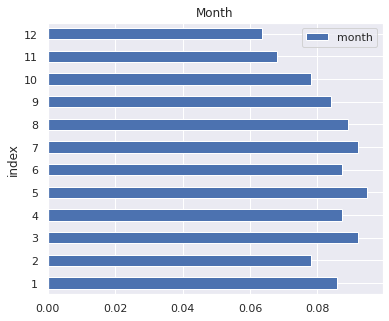

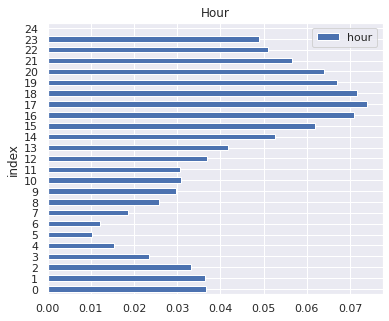

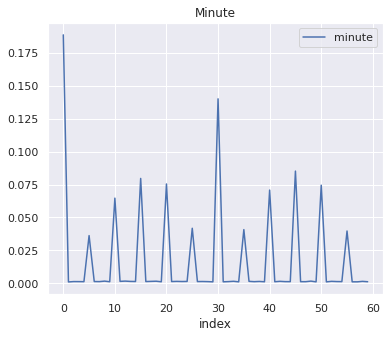

In [9]:
plot_time(data)

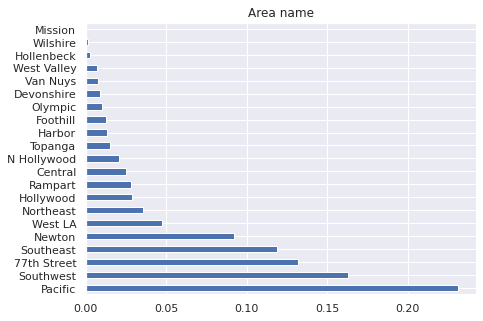

In [10]:
plot_all_area(data)

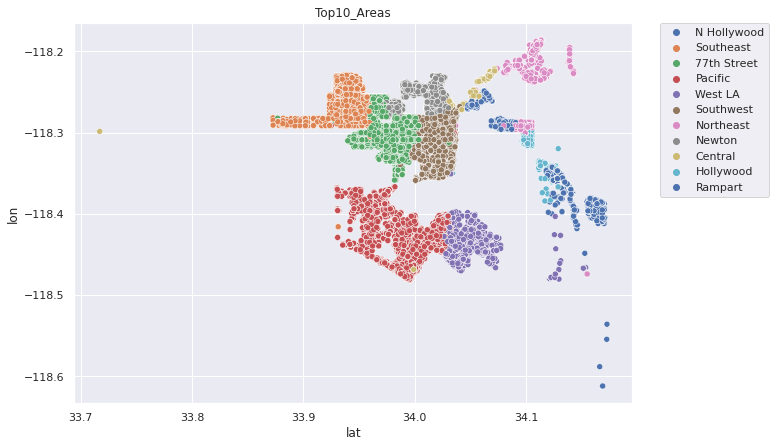

In [23]:
most_areas_all = plot_area(data)

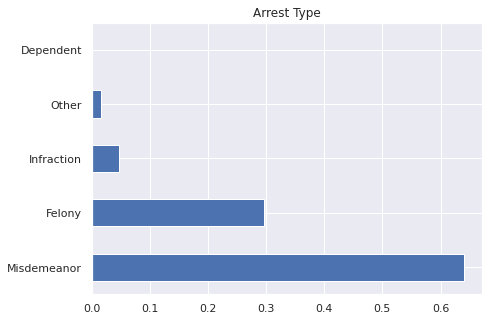

In [12]:
plot_arrest_type(data)

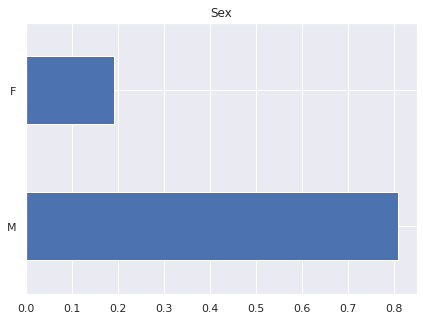

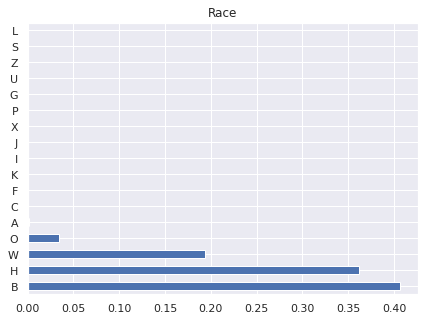

In [13]:
plot_sex_race(data)

## Checking Location & Area & and Cluster 2

In [15]:
cluster0 = data[data.grouping == 0.0]
cluster1 = data[data.grouping == 1.0]
cluster2 = data[data.grouping == 2.0]
cluster3 = data[data.grouping == 3.0]
cluster4 = data[data.grouping == 4.0]

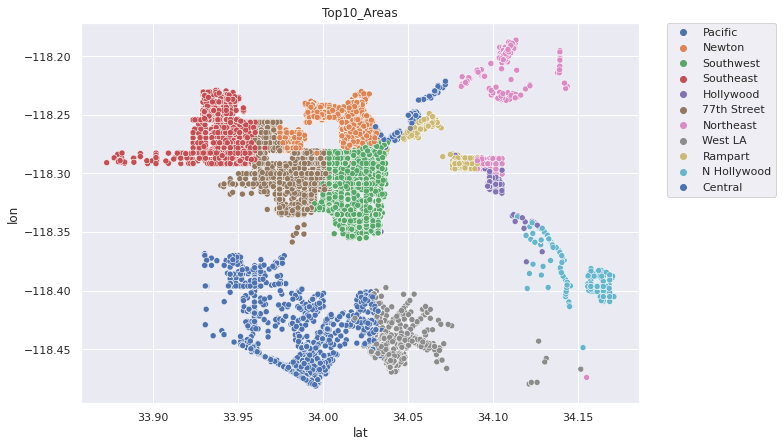

In [16]:
most_area_0 = plot_area(cluster0)
# cluster 0: slightly more Black and White, and significantly less Hispanic

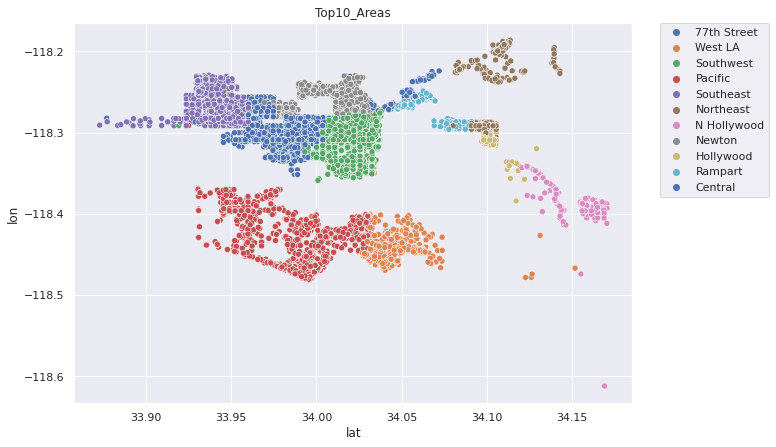

In [17]:
most_area_1 = plot_area(cluster1)
# cluster 1: significantly less Black, and slightly more Hispanic and White

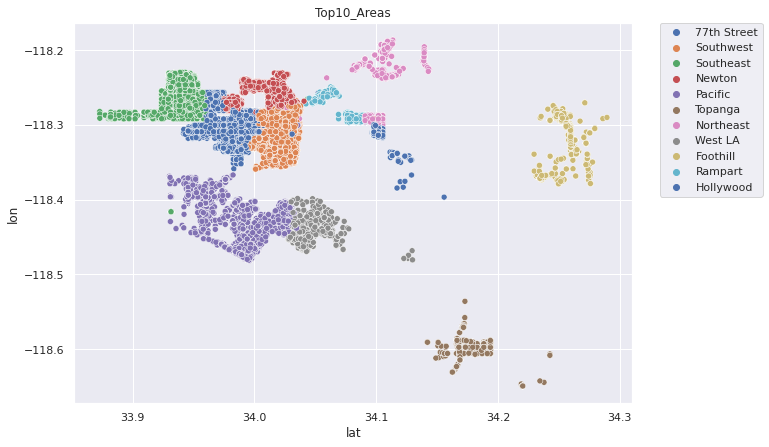

In [18]:
most_area_2 = plot_area(cluster2)
# cluster 2: significantly MORE Black, and significantly LESS White

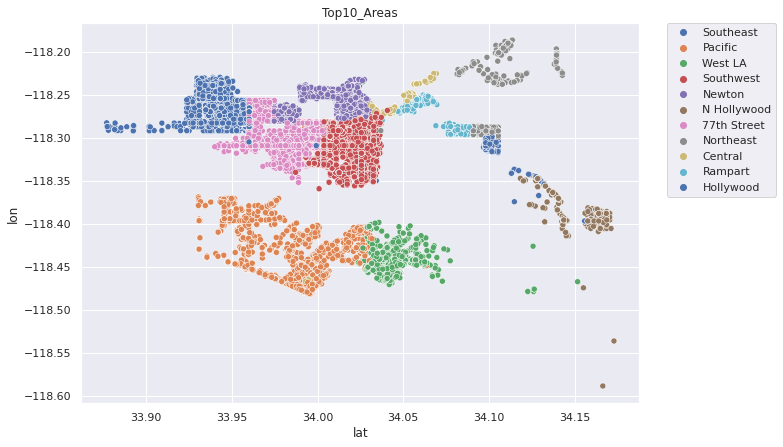

In [19]:
most_area_3 = plot_area(cluster3)
# cluster 3: significantly MORE Black, and significantly LESS Hispanic

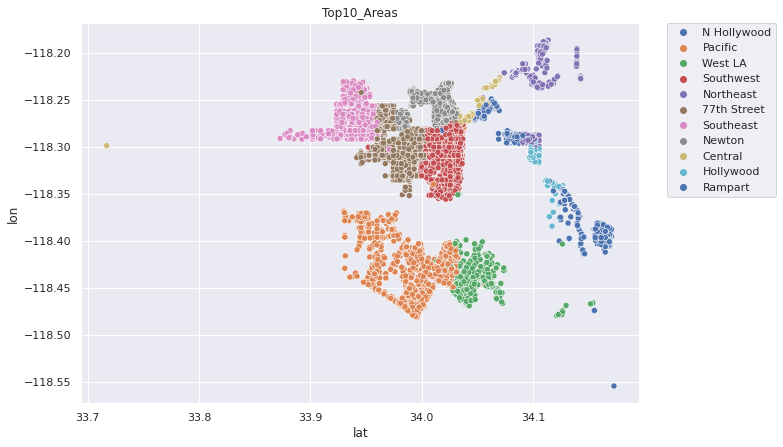

In [20]:
most_area_4 = plot_area(cluster4)
# cluster 4: significantly less Black, and slightly more Hispanic and White.

In [25]:
most_areas_df = pd.DataFrame().assign(all_data = most_areas_all, 
                                      most_area_0=most_area_0, 
                                      most_area_1=most_area_1, 
                                      most_area_2=most_area_2, 
                                      most_area_3=most_area_3, 
                                      most_area_4=most_area_4)
most_areas_df

,all_data,most_area_0,most_area_1,most_area_2,most_area_3,most_area_4
0,Pacific,Pacific,Pacific,77th Street,Pacific,Pacific
1,Southwest,Southwest,Southwest,Southwest,Southwest,Southwest
2,77th Street,77th Street,77th Street,Southeast,77th Street,77th Street
3,Southeast,Southeast,Southeast,Newton,Southeast,Southeast
4,Newton,Newton,Newton,Pacific,Newton,Newton
5,West LA,West LA,West LA,Northeast,West LA,West LA
6,Northeast,Northeast,Northeast,Rampart,Northeast,N Hollywood
7,Hollywood,Hollywood,Hollywood,West LA,Hollywood,Hollywood
8,Rampart,Central,Central,Hollywood,Central,Northeast
9,Central,Rampart,Rampart,Foothill,Rampart,Rampart


- **cluster 0**: more N Hollywood and Hollywood data (slightly more Black and White, and significantly less Hispanic)
- **cluster 1**: about the same with overall areas (significantly less Black, and slightly more Hispanic and White)
- **cluster 2**: <font color='red'>Most 77th Street data</font>, not much Pacific data; has data from Foothill and Topanga, but not include data from N Hollywood and Central. (significantly <font color='red'>MORE Black, and significantly LESS White</font>)
- **cluster 3**: about the same with overall areas (<font color='red'>significantly MORE Black, and significantly LESS Hispanic</font>)
- **cluster 4**: include data from Harbor and Topanga, but not from N Hollywood and Central. (significantly less Black, and slightly more Hispanic and White.)

Some Articles:
https://www.latimes.com/archives/la-xpm-1989-05-14-mn-412-story.html
**from LA Times: "The 77th by the numbers: More yellow crime-scene tape gets strung up in this division than anywhere else in the city. More rapes, more robberies, more assaults. More murders."**


For cluster 2:

Checked the communities in Foothills area: Tujunga, Lakeview Terrace, Sun Valley: neither has large population of Black (Tujunga has mostly White, and the other two has mostly Latino), so foothills prob is not the reason why cluster 2 has more Black.\
Also checked the communities in Topanga: Canoga Park, West Hills, Winnetka, Woodland Hills: all have mostly White and Lanito as well.\
The communities in 77th Street: Athens Park (mostly Black), Chesterfield Square, Gramercy Park, Hyde Park, South Park-51st and Menlo, Vermont Knolls, Vermont Park, View Heights, Morningside Park, West Park Terrance: almost all communities have half or more than half of the population Black.

In [26]:
data['area_name'].value_counts(normalize=True)
areas_dist_df = pd.DataFrame().assign(all_clusters = data['area_name'].value_counts(normalize=True), 
                                      cluster_0_area = cluster0['area_name'].value_counts(normalize=True), 
                                      cluster_1_area = cluster1['area_name'].value_counts(normalize=True), 
                                      cluster_2_area = cluster2['area_name'].value_counts(normalize=True), 
                                      cluster_3_area = cluster3['area_name'].value_counts(normalize=True), 
                                      cluster_4_area = cluster4['area_name'].value_counts(normalize=True))
areas_dist_df


,all_clusters,cluster_0_area,cluster_1_area,cluster_2_area,cluster_3_area,cluster_4_area
Pacific,0.231197,0.303675,0.264950,0.102818,0.276732,0.296622
Southwest,0.162816,0.146160,0.159728,0.192552,0.159860,0.134392
77th Street,0.131802,0.099451,0.105948,0.203317,0.104567,0.096497
Southeast,0.118535,0.099067,0.096541,0.173373,0.095709,0.090305
Newton,0.092284,0.087027,0.080173,0.119808,0.080991,0.074397
West LA,0.047494,0.055732,0.061682,0.022989,0.057680,0.055990
Northeast,0.035307,0.036533,0.041605,0.031614,0.038082,0.030878
Hollywood,0.028575,0.029731,0.031714,0.021287,0.031320,0.033889
Rampart,0.027845,0.025974,0.027790,0.027788,0.028270,0.029486
Central,0.025050,0.029210,0.030989,0.013634,0.030126,0.029032


In [27]:
def total_variation_distance(first_distrib, second_distrib):
    '''Computes the total variation distance between two distributions.'''
    return np.sum(np.abs(first_distrib - second_distrib)) / 2

In [29]:
for col in areas_dist_df.columns[1:]:
    print('tvd between overall and ', str(col), 'is: ', 
          total_variation_distance(np.array(areas_dist_df['all_clusters']), np.array(areas_dist_df[col]))
         )



tvd between overall and  cluster_0_area is:  0.08738026525874684
tvd between overall and  cluster_1_area is:  0.0674182446846495
tvd between overall and  cluster_2_area is:  0.19073677765837152
tvd between overall and  cluster_3_area is:  0.07203235706572406
tvd between overall and  cluster_4_area is:  0.11589187235852308


## Checking 77th Street with Other Features (Race, Sex, Arrest, Charge Type)
if 77th Street is why we have significantly more Black in cluster2:

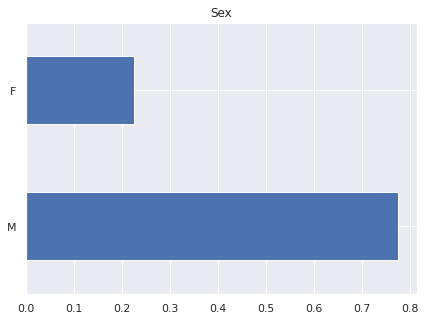

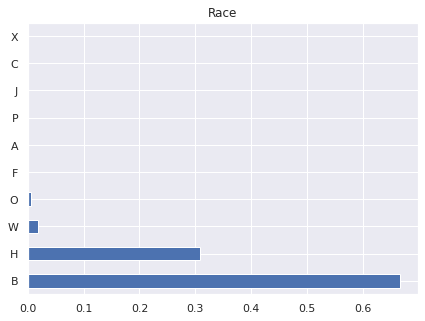

In [30]:
area_77 = data[data['area_name'] == '77th Street']

plot_sex_race(area_77)

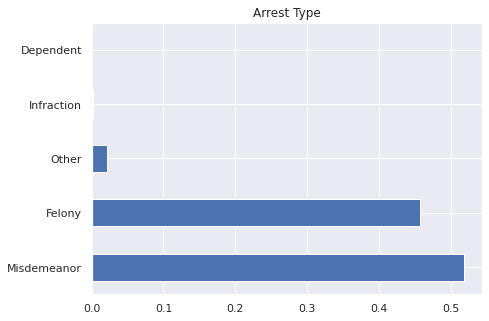

In [31]:
plot_arrest_type(area_77)

<font color='red'>77th Street Area has much much more Felony cases, and more Black, the time are a little bit later at night</font>

In [32]:
charge_compare_df = pd.DataFrame().assign(overall_charge=data.charge_description.value_counts(normalize=True), 
                                          area77_charge=area_77.charge_description.value_counts(normalize=True))

charge_compare_df


,overall_charge,area77_charge
Miscellaneous Other Violations,0.214011,0.135123
Driving Under Influence,0.142956,0.173085
Narcotic Drug Laws,0.124018,0.139604
Drunkeness,0.120119,0.040621
Moving Traffic Violations,0.059349,0.096980
Liquor Laws,0.052084,0.002259
Prostitution/Allied,0.043547,0.083573
Aggravated Assault,0.034006,0.051732
Vehicle Theft,0.029084,0.052497
Weapon (carry/poss),0.028560,0.059055


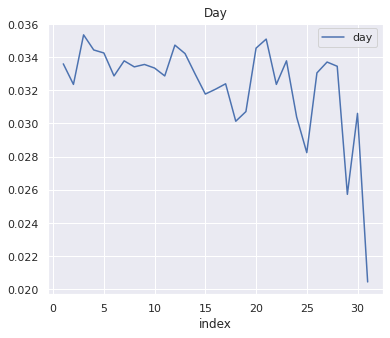

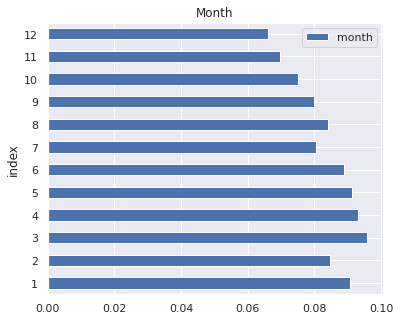

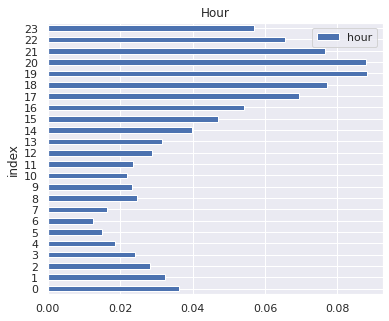

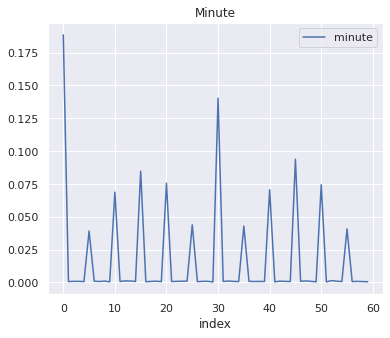

In [33]:
plot_time(area_77)

## More on Cluster 2:

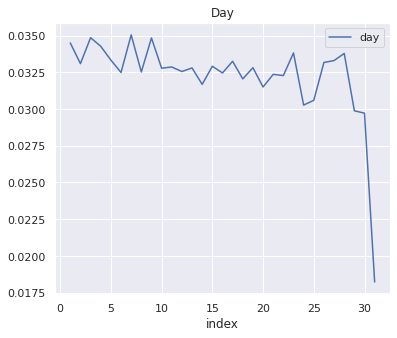

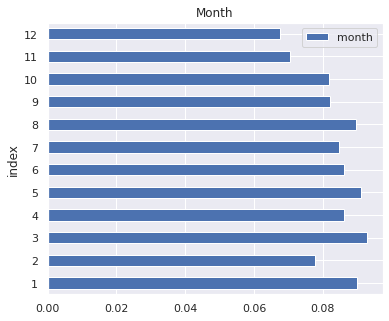

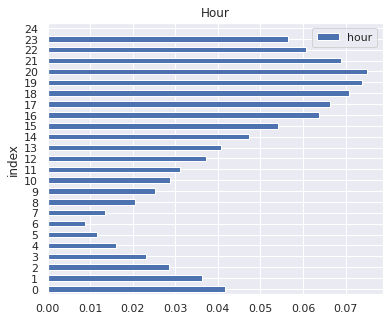

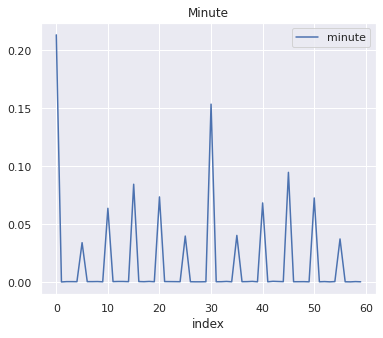

In [34]:
plot_time(cluster2)

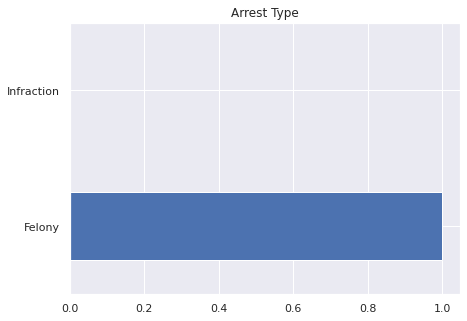

In [30]:
plot_arrest_type(cluster2)

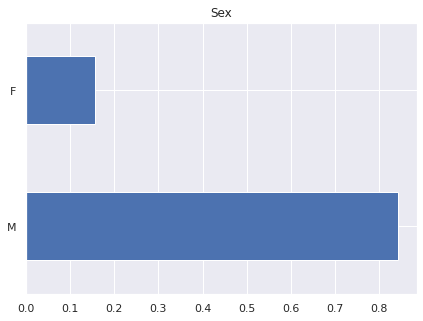

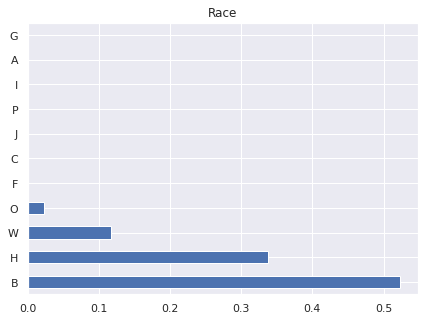

In [31]:
plot_sex_race(cluster2)

## Checking Cluster 3 (0 and 3 significantly less Hispanic: 2 and 3: MORE Black)

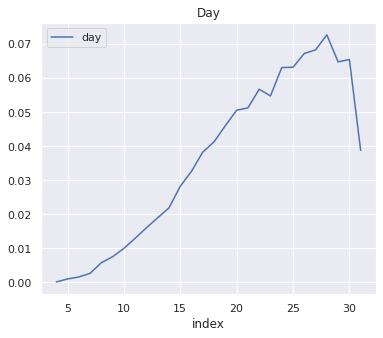

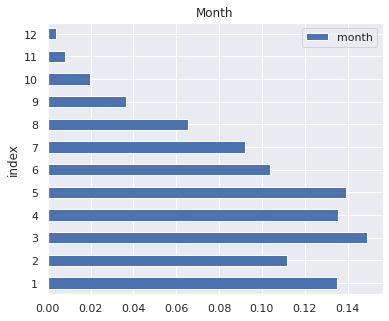

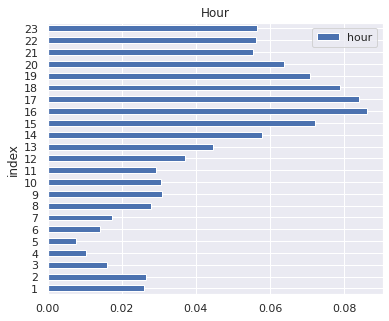

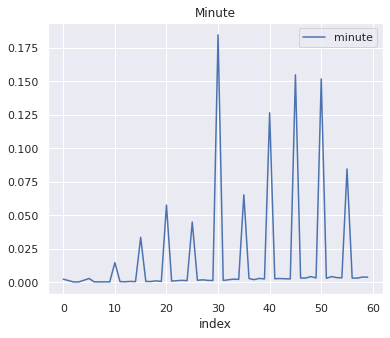

In [32]:
plot_time(cluster3)

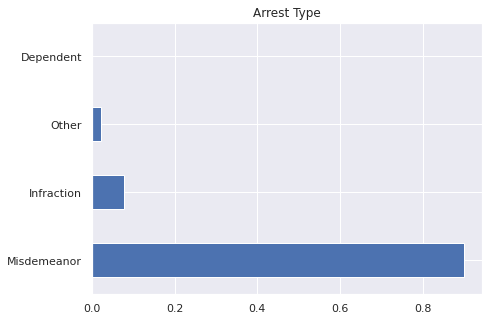

In [33]:
plot_arrest_type(cluster3)

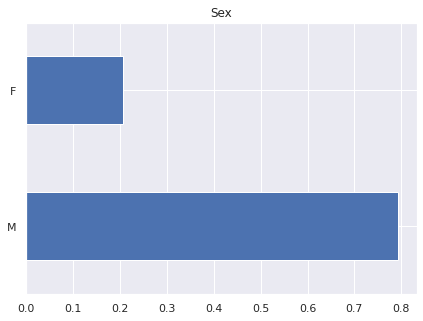

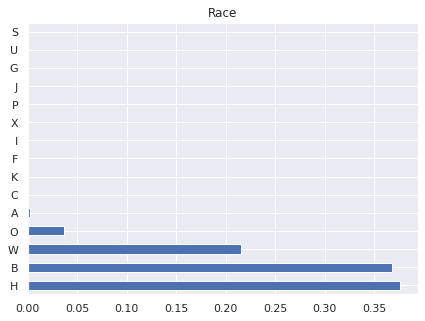

In [34]:
plot_sex_race(cluster3)

## Checking CLuster 0

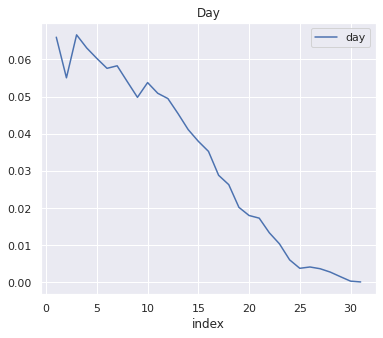

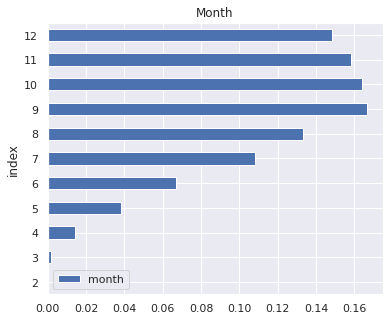

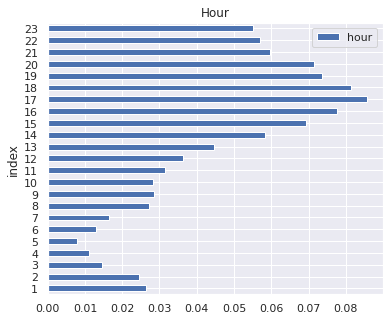

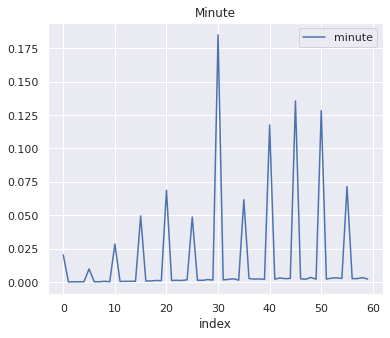

In [35]:
plot_time(cluster0)

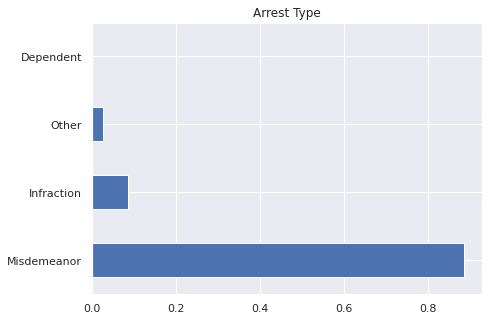

In [36]:
plot_arrest_type(cluster0)

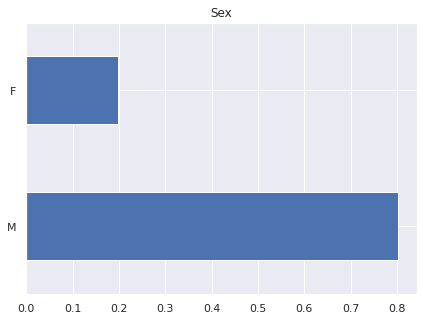

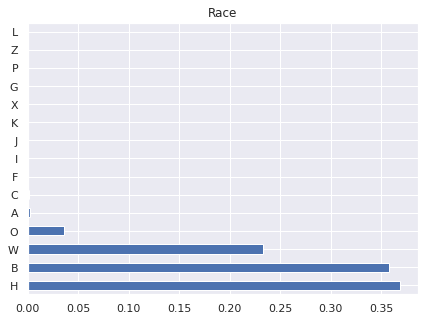

In [37]:
plot_sex_race(cluster0)

## Checking Cluster 1 and 4 (significantly less Black)

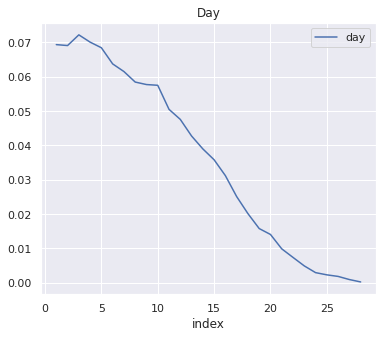

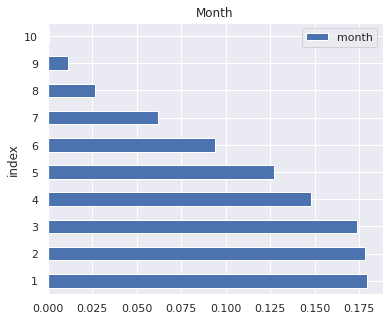

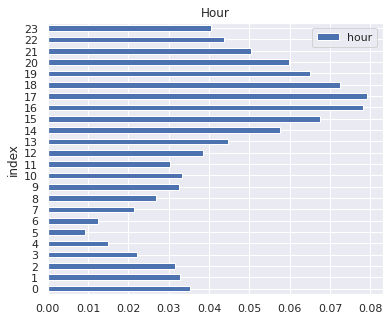

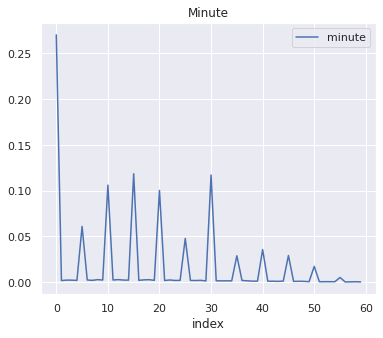

In [38]:
plot_time(cluster1)

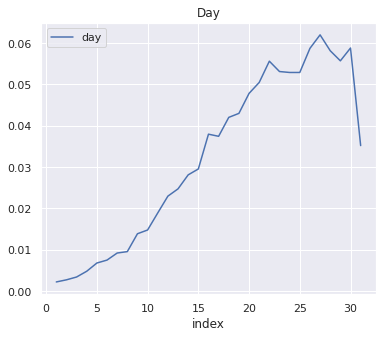

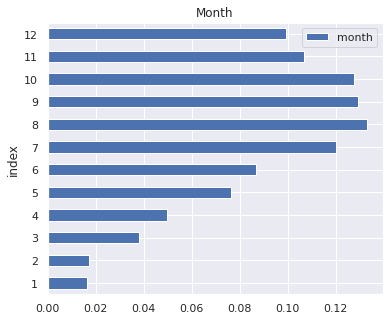

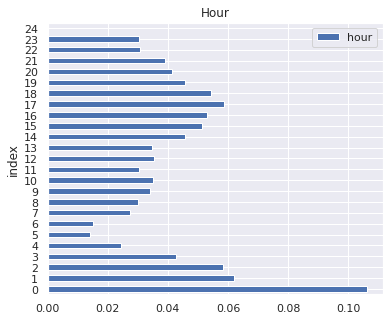

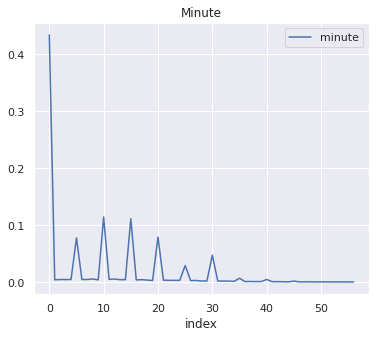

In [39]:
plot_time(cluster4)

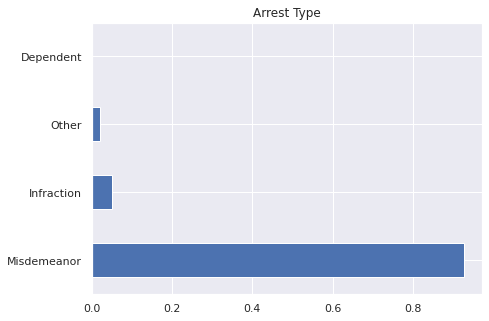

In [40]:
plot_arrest_type(cluster1)

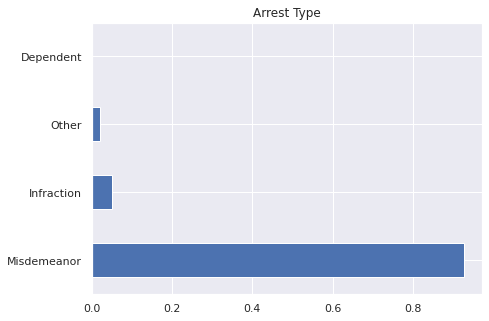

In [41]:
plot_arrest_type(cluster1)

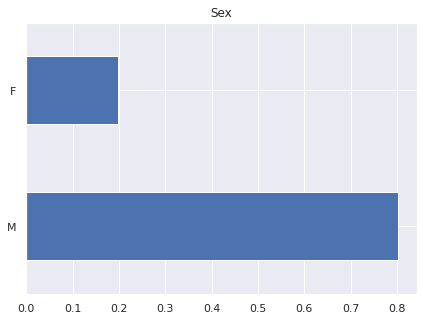

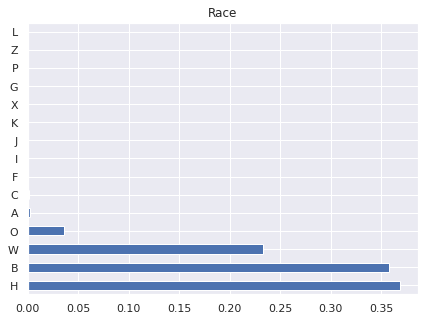

In [42]:
plot_sex_race(cluster0)

In [43]:
data.to_csv('features_with_cluster_new.csv')

#'charge_1Homicide', 'charge_2Rape', 'charge_3Robbery', 
               'charge_4AggravatedAssault', 'charge_5Burglary', 'charge_6Larceny', 
               'charge_7VehicleTheft', 'charge_9OtherAssaults', 'charge_9Forgery/Counterfeit', 
               'charge_10Fraud/Embezzlement', 'charge_11ReceiveStolenProperty', 
               'charge_12Weapon(carry/poss)', 'charge_13Prostitution/Allied', 
               'charge_14Sex(exceptRape/prst)', 'charge_15AgainstFamily/Child', 'charge_16'

In [33]:
#D - Dependent F - Felony I - Infraction M - Misdemeanor O - Other
feature_col = ['day', 'month', 'hour', 'minute', 'area', 'lat','lon','age',
               'arrest_Dependent', 'arrest_Felony', 'arrest_Infraction', 'arrest_Misdemeanor', 
               'arrest_Other', 1.0,  2.0,      3.0,      4.0,      5.0,      6.0,      7.0,      8.0,
            9.0,     10.0,     11.0,     12.0,     13.0,     14.0,     15.0,
           16.0,     17.0,     18.0,     19.0,     20.0,     21.0,     22.0,
           23.0,     24.0,     25.0,     26.0,     27.0
               ]

lon centroids at: [0.63126429 0.63841493 0.72587353 0.63823493 0.62059318]\
arrest type of F centroids at: [0.02289708 0.01039936 0.99527436 0.01621098 0.0322704 ]\
arrest type of M centroids at: [0.8804799  0.90637899 0.         0.89016342 0.88955379]\
arrest type of O centroids at: [0.02265606 0.02264808 0.00322975 0.02215588 0.02057546]\

Greater for charge num 3 to 12:\
charge num  3.0 centroids at: [0.00131223 0.00050925 0.08618345 0.00091661 0.002104  ]\
charge num  4.0 centroids at: [0.00632013 0.00554811 0.10359013 0.00604965 0.00857994]\
charge num  5.0 centroids at: [0.00176749 0.0010453  0.04751139 0.00170228 0.00254119]\
charge num  6.0 centroids at: [0.01266704 0.01251675 0.02609302 0.01346114 0.01401754]\
charge num  7.0 centroids at: [0.00281192 0.00241222 0.09500578 0.00267128 0.00467251]\
charge num  9.0 centroids at: [0.00117833 0.0010721  0.01093017 0.00073329 0.00139356]\
charge num  10.0 centroids at: [0.00254412 0.00182257 0.01295302 0.00222606 0.00289641]\
charge num  11.0 centroids at: [0.00174071 0.00128652 0.0145339  0.00167609 0.0016668 ]\
charge num  12.0 centroids at: [0.00530248 0.00418118 0.08808731 0.00505447 0.0059841 ]\

Wayyy Greater for charge 16:\
charge num  16.0 centroids at: [0.06287994 0.06395068 0.27961175 0.06167505 0.06257343]\

Less for charge 13, 15: \
charge num  13.0 centroids at: [0.05846121 0.0598231  0.00178486 0.06403206 0.05749105]\
charge num  15.0 centroids at: [0.00265124 0.00235862 0.00037397 0.00277603 0.00218597]\
charge num  17.0 centroids at: [0.07902841 0.06727419 0.00030598 0.07791221 0.06538787]\
charge num  18.0 centroids at: [0.17562465 0.17839721 0.00042497 0.17106641 0.14331776]\
charge num  19.0 centroids at: [0.00101765 0.00115251 0.         0.00115232 0.00109299]\
charge num  20.0 centroids at: [0.03701026 0.03688019 0.00013599 0.03462183 0.04180671]\
charge num  21.0 centroids at: [2.32987869e-03 1.52774055e-03 5.09961243e-05 1.99036246e-03
 1.96737437e-03]\
charge num  22.0 centroids at: [0.18068611 0.17879925 0.03054668 0.17674942 0.21335082]\
charge num  23.0 centroids at: [0.07734126 0.07992495 0.01195009 0.0800859  0.07456895]\
charge num  24.0 centroids at: [0.23588013 0.23784508 0.15606514 0.23449612 0.23917261]\
charge num  27.0 centroids at: [0.0129884  0.02213884 0.00011899 0.02105594 0.01409952]\